# Feature Importance and Permutation Importance

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_log_error
from sklearn import tree
from IPython.display import Image  
from sklearn.inspection import PartialDependenceDisplay
from sklearn.base import is_classifier, is_regressor
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn import tree
from IPython.display import Image  
from numpy import linalg
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
import random
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import xgboost
from sklearn.pipeline import Pipeline
import seaborn as sns


def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Data sets

In [2]:
adult = pd.read_csv("../../datasets/adult/adult.csv", delimiter=",", skipinitialspace=True)
adult = adult.drop(columns=['fnlwgt'])
print("Adult Shape:", adult.shape)
adult.head(5)

Adult Shape: (32561, 14)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- age: The age of the individuals

- workclass: A general term to represent the employment status of an individual

- education: The highest level of education achieved by an individual.

- education_num: the highest level of education achieved in numerical form.

- marital_status: marital status of an individual.

- occupation: the general type of occupation of an individual

- relationship: whether the individual is in a relationship-

- race: Descriptions of an individual’s race

- sex: the biological sex of the individual

- captain-gain: capital gains for an individual

- captain-loss: capital loss for an individual

- hours-per-week: the hours an individual has reported to work per week

- target: whether or not an individual makes more than $50,000 annually

In [89]:
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week' ]
categorical_features = ['y', 'marital-status', 'workclass', 'race', 'sex', 'relationship', 'occupation', 'education', 'native-country']

for column in categorical_features:
    unique_values = adult[column].unique()
    print(f"{column}: {unique_values}")

y: ['<=50K' '>50K']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'H

### One Hot Encoding

In [52]:
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", encoder, categorical_features),
    ]
).set_output(transform="pandas")

adult_encoded = preprocessor.fit_transform(adult)


In [53]:
adult_encoded

,cat__y_>50K,cat__marital-status_Divorced,cat__marital-status_Married-AF-spouse,cat__marital-status_Married-civ-spouse,cat__marital-status_Married-spouse-absent,cat__marital-status_Never-married,cat__marital-status_Separated,cat__marital-status_Widowed,cat__workclass_?,cat__workclass_Federal-gov,...,cat__native-country_Portugal,cat__native-country_Puerto-Rico,cat__native-country_Scotland,cat__native-country_South,cat__native-country_Taiwan,cat__native-country_Thailand,cat__native-country_Trinadad&Tobago,cat__native-country_United-States,cat__native-country_Vietnam,cat__native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
y = adult_encoded.loc[:,'cat__y_>50K']
#y = adult_encoded.loc[:,'y']
X = adult_encoded.drop(columns=['cat__y_>50K'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = DecisionTreeClassifier()
#model = RandomForestClassifier()
model.fit(X_train, y_train);

y_pred1 = model.predict(X_test)  

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      2472
         1.0       0.65      0.57      0.61       785

    accuracy                           0.82      3257
   macro avg       0.76      0.74      0.75      3257
weighted avg       0.82      0.82      0.82      3257



In [5]:
# Bank Marketing Dataset from
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#bank = pd.read_csv("../../datasets/bank_marketing/bank/bank-full.csv", delimiter = ";")
#bank = pd.read_csv("bank-full.csv", delimiter = ";")
# print first 5 examples
#bank.head(5)

In [6]:
# X = bank.loc[:,'age':'poutcome']
# X["random_num"] = np.random.rand(X.shape[0])
# X.drop(columns=['duration'], inplace=True)

# y = bank.loc[:,'y']
# y = y.replace(["yes","no"],[1,0])
# X = pd.get_dummies(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_test.mean())
 
# dt_model = DecisionTreeClassifier(max_depth=5)
# dt_model.fit(X_train, y_train);

# y_pred1 = dt_model.predict(X_test)  

# print(classification_report(y_test,y_pred1))

### Tree models
### Feature importance scores

Total reduction in impurity brought by the feature (for categorical classes) and total reduction in variance brought by the feature (for numerical classes). Impurity-based feature importances can be misleading for high cardinality features.

In [70]:
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"feature_name":X.columns[sorted_idx], "value":sorted_vals}
imp_df = pd.DataFrame(d)
imp_df[:10]

,feature_name,value
0,cat__marital-status_Married-civ-spouse,0.382453
1,cat__occupation_Exec-managerial,0.083649
2,cat__occupation_Prof-specialty,0.061812
3,cat__education_Bachelors,0.038931
4,cat__education_Masters,0.022059
5,cat__workclass_Self-emp-not-inc,0.017768
6,cat__education_Some-college,0.016284
7,cat__workclass_Private,0.015957
8,cat__race_White,0.015519
9,cat__native-country_United-States,0.015477


In [75]:
imps = []
for col in adult.columns:   
    imps.append(sum(imp_df[imp_df['feature_name'].str.contains(f'_{col}_')].value))

sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"feature_name":adult.columns[sorted_idx], "value":sorted_vals}
imp_df = pd.DataFrame(d)
imp_df[:10]

,feature_name,value
0,marital-status,0.406562
1,occupation,0.210241
2,education,0.150869
3,workclass,0.075266
4,native-country,0.065433
5,race,0.040277
6,relationship,0.039732
7,sex,0.011619
8,y,0.000000
9,hours-per-week,0.000000


### Ordinal Encoding

In [78]:
encoder = OrdinalEncoder().set_output(transform="pandas")

adult_encoded = encoder.fit_transform(adult)
adult_encoded

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,22.0,7.0,9.0,12.0,4.0,1.0,1.0,4.0,1.0,25.0,0.0,39.0,39.0,0.0
1,33.0,6.0,9.0,12.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,12.0,39.0,0.0
2,21.0,4.0,11.0,8.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,39.0,39.0,0.0
3,36.0,4.0,1.0,6.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,39.0,39.0,0.0
4,11.0,4.0,9.0,12.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,39.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10.0,4.0,7.0,11.0,2.0,13.0,5.0,4.0,0.0,0.0,0.0,37.0,39.0,0.0
32557,23.0,4.0,11.0,8.0,2.0,7.0,0.0,4.0,1.0,0.0,0.0,39.0,39.0,1.0
32558,41.0,4.0,11.0,8.0,6.0,1.0,4.0,4.0,0.0,0.0,0.0,39.0,39.0,0.0
32559,5.0,4.0,11.0,8.0,4.0,1.0,3.0,4.0,1.0,0.0,0.0,19.0,39.0,0.0


In [79]:
y = adult_encoded.loc[:,'y']
#y = adult_encoded.loc[:,'y']
X = adult_encoded.drop(columns=['y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = DecisionTreeClassifier()
#model = RandomForestClassifier()
model.fit(X_train, y_train);

y_pred1 = model.predict(X_test)  

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2528
         1.0       0.61      0.61      0.61       729

    accuracy                           0.82      3257
   macro avg       0.75      0.75      0.75      3257
weighted avg       0.82      0.82      0.82      3257



In [80]:
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"feature_name":X.columns[sorted_idx], "value":sorted_vals}
imp_df = pd.DataFrame(d)
imp_df[:10]

,feature_name,value
0,relationship,0.220320
1,age,0.169053
2,education-num,0.128903
3,capital-gain,0.127107
4,hours-per-week,0.105309
5,occupation,0.077242
6,workclass,0.049992
7,capital-loss,0.042286
8,race,0.024456
9,native-country,0.020397


The following figure shows that those who are not husbands strongly tend to earn <=50k

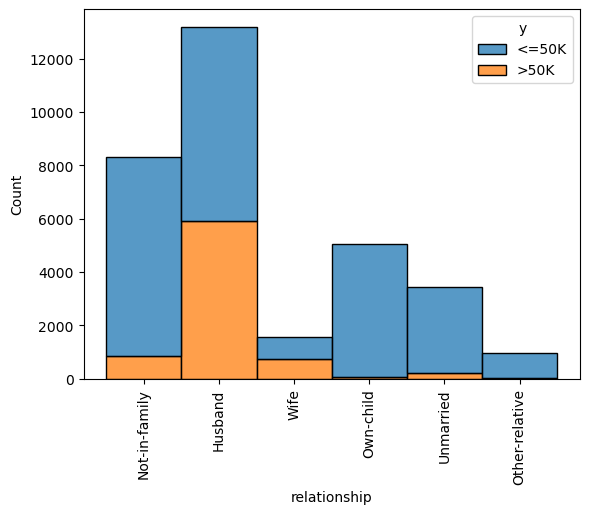

In [86]:
sns.histplot(data=adult, x="relationship", hue="y", multiple="stack");
plt.xticks(rotation=90);

The following figure shows that those who are not married-civ-spouse strongly tend to earn <=50k

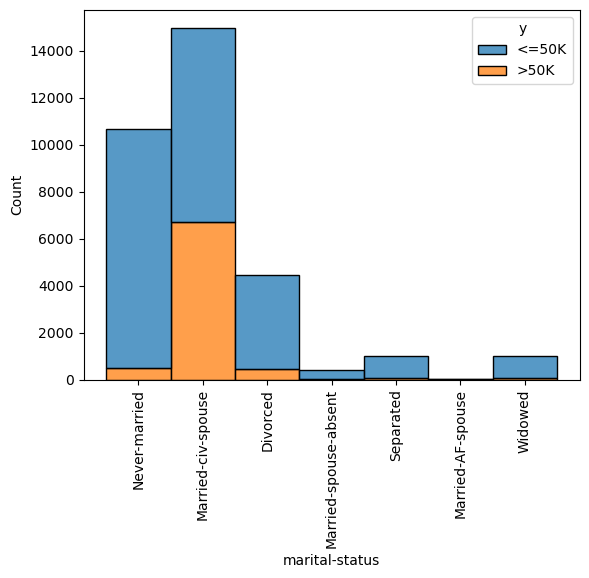

In [87]:
sns.histplot(data=adult, x="marital-status", hue="y", multiple="stack");
plt.xticks(rotation=90);

Below we see that being husband and being married-civ-spouse are higly correlated

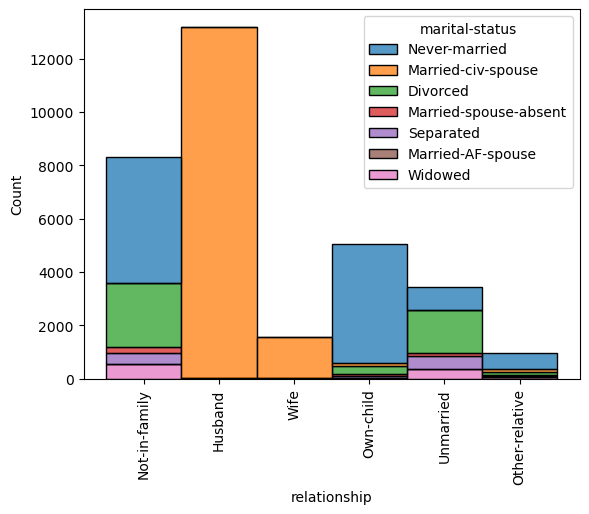

In [84]:
sns.histplot(data=adult, x="relationship", hue="marital-status", multiple="stack");
plt.xticks(rotation=90);

### Impurity and Variance 

The Gini impurity for a set $S$ with $K$ classes is:

$$
Gini(S) = 1 - \sum_{i=1}^{K} p_i^2
$$

where:
- $S$ is the set of instances.
- $K$ is the number of classes or labels.
- $p_i$ is the relative frequence of class $i$ in $S$.

Examples:

In [12]:
def gini_impurity(freqs):
    gini_imp = 1 - sum(p ** 2 for p in freqs)
    return gini_imp
    
freqs = [0.1, 0.9]
print(gini_impurity(freqs))
freqs = [0.5, 0.5]
print(gini_impurity(freqs))


0.17999999999999994
0.5


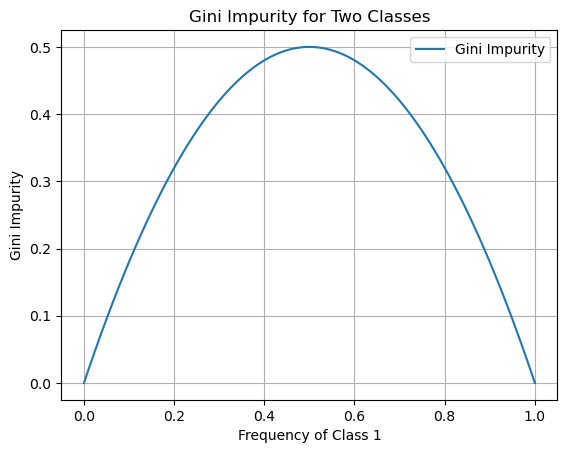

In [33]:
freq_class1 = np.linspace(0, 1, 100)
gini_values = [gini_impurity([p, 1 - p]) for p in freq_class1]

# Plotting
plt.plot(freq_class1, gini_values, label='Gini Impurity')
plt.title('Gini Impurity for Two Classes')
plt.xlabel('Frequency of Class 1')
plt.ylabel('Gini Impurity')
plt.legend()
plt.grid(True)
plt.show()

### sklearn tree structure

The entire binary tree structure is represented as a number of parallel arrays. The i-th element of each array holds information about the node i. Node 0 is the tree’s root. Nunbers are assigned in a depth-first order.

Some of these are:

- children_left[i]: id of the left child of node i or -1 if leaf node

- children_right[i]: id of the right child of node i or -1 if leaf node

- feature[i]: feature used for splitting node i

- threshold[i]: threshold value at node i

- n_node_samples[i]: the number of training samples reaching node i

- impurity[i]: the impurity at node i

For more information:
[sklearn tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)

### Feature importances from scratch

In [9]:
def my_feature_importance(tree, idx, imps, normalized = True):
    """
    :tree: Decision tree built
    :idx: Index of the root of the subtree that the importances will be calculated.
    :imps: feature importances, should be initialized to all zeros 
    :return: imps
    """
    if tree.children_left[idx] > -1:
        imps[tree.feature[idx]]+=(tree.n_node_samples[idx]*tree.impurity[idx] 
        - tree.n_node_samples[tree.children_left[idx]]*tree.impurity[tree.children_left[idx]]
        - tree.n_node_samples[tree.children_right[idx]]*tree.impurity[tree.children_right[idx]])

        my_feature_importance(tree, tree.children_left[idx], imps, normalized)
        my_feature_importance(tree, tree.children_right[idx], imps, normalized)
    
    if normalized:
        return imps/np.sum(imps)
    else:
        return imps

Now, let us check my_feature_importance finds the same importance values as sklearn

In [10]:
imps = np.zeros(model.n_features_in_)
imps = my_feature_importance(model.tree_,0, imps, normalized=True)
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

imps = model.feature_importances_
sk_sorted_idx = np.argsort(imps)[::-1]
sk_sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals, "sklearn features":X.columns[sk_sorted_idx], "sklearn values":sk_sorted_vals}
pd.DataFrame(d)

,features,values,sklearn features,sklearn values
0,relationship,0.460185,relationship,0.460185
1,capital-gain,0.238791,capital-gain,0.238791
2,education-num,0.224242,education-num,0.224242
3,age,0.038560,age,0.038560
4,capital-loss,0.021510,capital-loss,0.021510
5,hours-per-week,0.013521,hours-per-week,0.013521
6,occupation,0.002585,occupation,0.002585
7,workclass,0.000335,workclass,0.000335
8,fnlwgt,0.000270,fnlwgt,0.000270
9,native-country,0.000000,native-country,0.000000


### Building Intuition

In [13]:
model = DecisionTreeClassifier(max_depth=2)
#model = RandomForestClassifier()
model.fit(X, y);

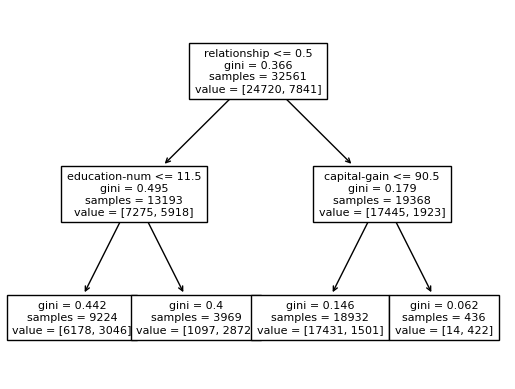

In [14]:
tree.plot_tree(model, feature_names=list(adult.columns), fontsize=8);

In [25]:
rel = 32561*0.366 - (13193*0.495 + 19368*0.179)
edu = 13193*0.495 - (9224*0.442 + 3969*0.4)
cap = 19368*0.179 - (18932*0.146 + 436*0.062)
total = rel + edu + cap
print(rel /total, edu/total, cap/total)

0.554631163382168 0.25015123003315787 0.19521760658467413


In [15]:
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals}
pd.DataFrame(d)[:3]

,features,values
0,relationship,0.555543
1,education-num,0.249182
2,capital-gain,0.195275


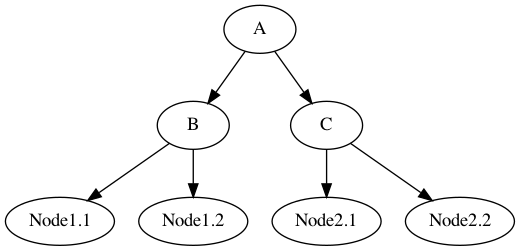

In [38]:
import graphviz

# Define a simple tree structure
tree_structure = {
    'A': ['B ', 'C'],
    'B': ['Node1.1', 'Node1.2'],
    'C': ['Node2.1', 'Node2.2'],
    'Node1.1': [],
    'Node1.2': [],
    'Node2.1': [],
    'Node2.2': []
}

# Create a directed graph
dot = graphviz.Digraph(comment='General Tree')

# Add nodes and edges to the graph
for parent, children in tree_structure.items():
    dot.node(parent)
    for child in children:
        dot.edge(parent, child)

# Render the graph to a file (e.g., in PNG format)
dot.render('general_tree', format='png', cleanup=True)

# Display the image in Jupyter Notebook
from IPython.display import Image
Image(filename='general_tree.png')


### Some Observations
- Gini importance give more importance to features which affects more examples and which leads to more reduction in gini. 

## Problems
### Inconsistent results
There are different ways to measure feature importances of a tree model. These give inconsistent results. Following are different ways of measuring importance in XGBoost:

”weight” is the number of times a feature appears in a tree

”gain” is the average gain of splits which use the feature

”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

This is a nice example to show that there is no single way to define feature importance. Having different definitions is not a problem if you know what the definitions are and their implied properties. Otherwise the interpretation of the results might not be correct. Moreover, different definitions might not be consistent which each other. That is, a feature which turns out to be very important with respect to one definition might not be that much important with respect to another definition.

Below examples show these inconsistent results:

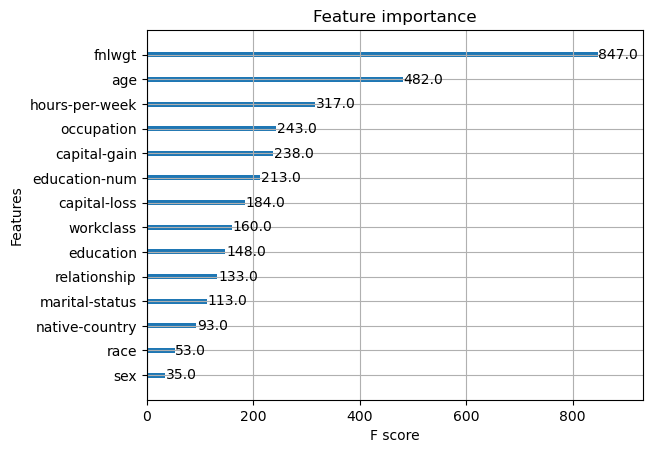

In [11]:
xgb_clf = xgboost.XGBClassifier().fit(X,y)

xgboost.plot_importance(xgb_clf, importance_type="weight");

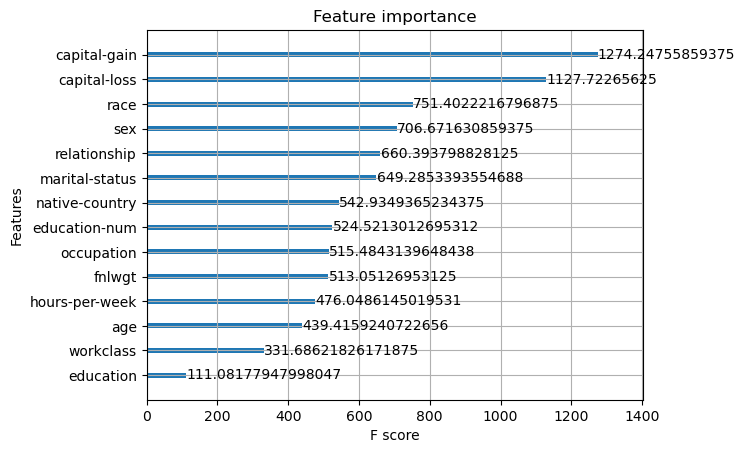

In [12]:
xgboost.plot_importance(xgb_clf, importance_type="cover");

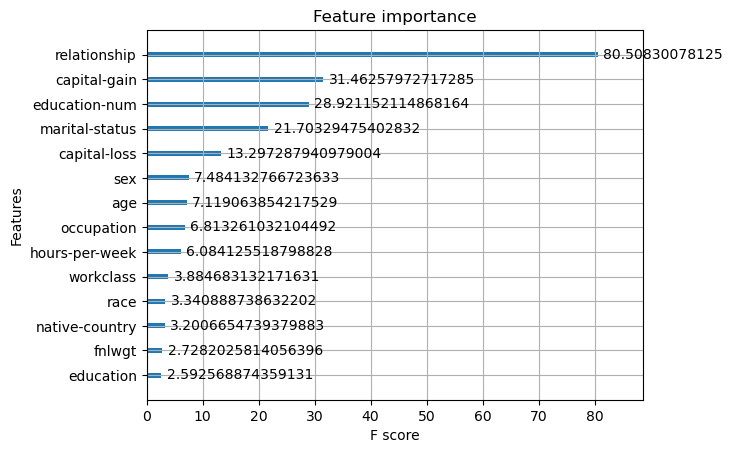

In [13]:
xgboost.plot_importance(xgb_clf, importance_type="gain");

### Random Feature

In [109]:
rng = np.random.RandomState(seed=42)
X["random_cat"] = rng.randint(3, size=X.shape[0])
X["random_num"] = rng.randn(X.shape[0])

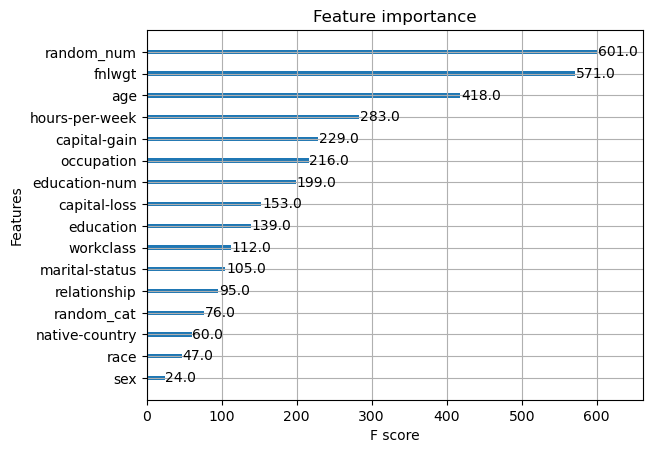

In [113]:
xgb_clf = xgboost.XGBClassifier().fit(X,y)
xgboost.plot_importance(xgb_clf, importance_type="weight");

In [116]:
model = RandomForestClassifier().fit(X,y)
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals}
pd.DataFrame(d)

,features,values
0,age,0.114860
1,capital-gain,0.113603
2,random_num,0.112228
3,fnlwgt,0.111547
4,relationship,0.096939
5,education-num,0.095469
6,marital-status,0.075046
7,hours-per-week,0.068458
8,occupation,0.054513
9,capital-loss,0.034977


In [120]:
model = DecisionTreeClassifier().fit(X,y)
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals}
pd.DataFrame(d)

,features,values
0,relationship,0.197295
1,fnlwgt,0.127662
2,random_num,0.123925
3,education-num,0.114667
4,capital-gain,0.112988
5,age,0.089720
6,hours-per-week,0.060996
7,occupation,0.043729
8,capital-loss,0.036443
9,workclass,0.027919


Let us now look at house price prediction dataset

In [60]:
# Run Regression Tree with top correlated 10 attributes with SalePrice

train = pd.read_csv("../../datasets/house/train.csv")
#train = pd.read_csv("train.csv")
#test = pd.read_csv("../datasets/house_prices/test.csv")

cors = train.corr(numeric_only=True); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())
regr = DecisionTreeRegressor()
model = regr.fit(X_train, y_train)
test_predictions = model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))



Test MAE: 30971.794520547945


In [61]:
imps = regr.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

imps = np.zeros(regr.n_features_in_)
imps = my_feature_importance(regr.tree_,0, imps)
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals, "sklearn features":X.columns[sorted_idx], "sklearn values":sorted_vals}
pd.DataFrame(d)

,features,values,sklearn features,sklearn values
0,OverallQual,0.659411,OverallQual,0.659411
1,GrLivArea,0.136680,GrLivArea,0.136680
2,TotalBsmtSF,0.060375,TotalBsmtSF,0.060375
3,1stFlrSF,0.034152,1stFlrSF,0.034152
4,GarageCars,0.026024,GarageCars,0.026024
5,YearRemodAdd,0.024080,YearRemodAdd,0.024080
6,GarageArea,0.023317,GarageArea,0.023317
7,YearBuilt,0.021422,YearBuilt,0.021422
8,TotRmsAbvGrd,0.010262,TotRmsAbvGrd,0.010262
9,FullBath,0.004278,FullBath,0.004278


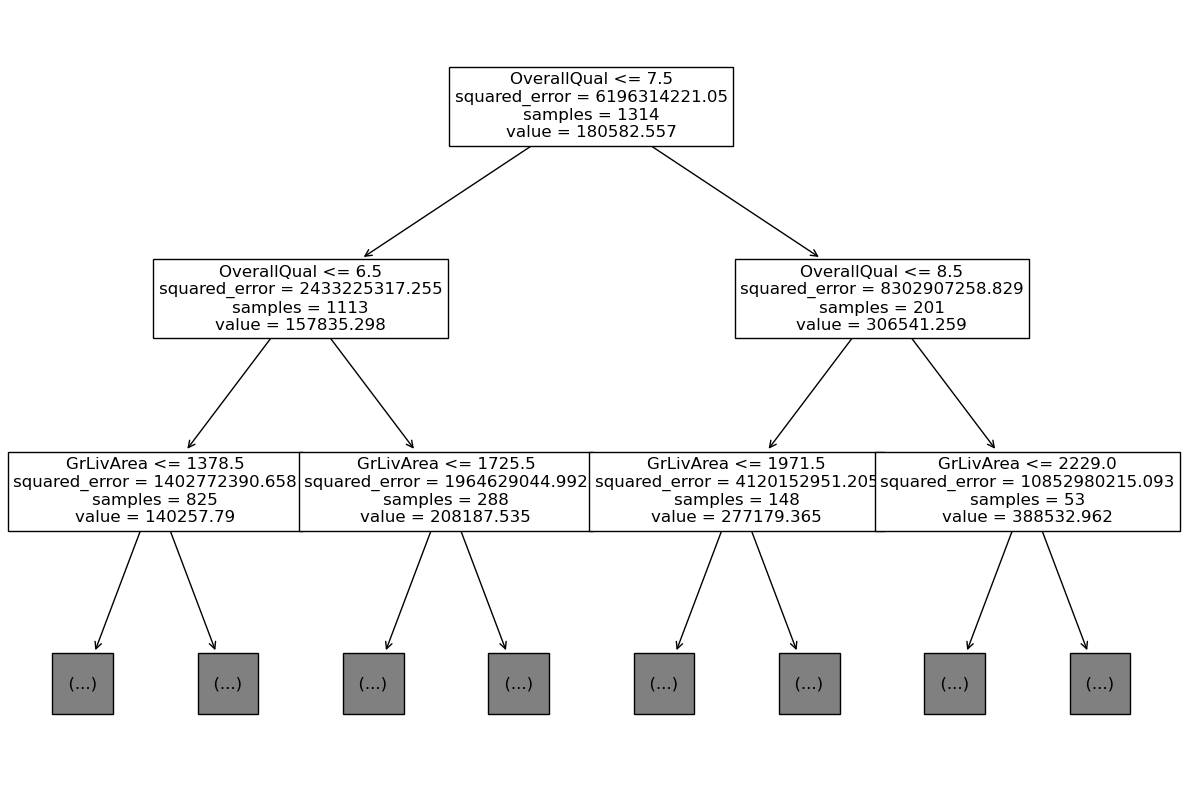

In [62]:
plt.figure(figsize=(15,10));
tree.plot_tree(regr, feature_names=list(X.columns),max_depth=2, fontsize=12);

### Discussion

- Feature importance scores are computed on the model which is fitted on the training set, therefore if a model overfits than the scores can be misleading. You can try to add a random feature to see this result.
- It is better to evaluate the importance of a feature on the test set. Permutation importance can help at this point.
- It is important not to forget that these scores only show the importance of a feature relative to a model. In other words how much a model relies on a feature. A feature which might not be used by a model does not mean that that feature is unimportant in general. This might happen, for example, when there are two important but correlated features. A decision tree will choose one of them and will not use the other one. This does not mean that the unused feature is not important in general.
- Permutation feature importance requires the true labels in addition to the model.
- Correlated features might create problems. Suppose that feature A is very important, if you add a correlated feature B, and then train a random forest, then some of the trees will use feature A and some of the trees will use feature B. As a result, the importance of these features will decrease.

### Permutation Importance

Permutation importance of a feature in the decrease in model score when the values of that feature are randomly shuffled.

In [14]:
X = bank_balanced.loc[:,'age':'poutcome']
X["random_num"] = np.random.rand(X.shape[0])
X.drop(columns=['duration'], inplace=True)

y = bank_balanced.loc[:,'y']
y = y.replace(["yes","no"],[1,0])
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
 
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

y_pred1 = clf.predict(X_test)  

print(classification_report(y_test,y_pred1))

NameError: name 'bank_balanced' is not defined

In [15]:
X.shape

(1460, 10)

In [16]:
perm_test = permutation_importance(clf, X_test, y_test)
perm_train = permutation_importance(clf, X_train, y_train)

NameError: name 'clf' is not defined

In [17]:
imps = clf.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

perm_imps_test = perm_test['importances_mean']
perm_sorted_idx_test = np.argsort(perm_imps_test)[::-1]
perm_sorted_vals_test = np.sort(perm_imps_test)[::-1]

perm_imps_train = perm_train['importances_mean']
perm_sorted_idx_train = np.argsort(perm_imps_train)[::-1]
perm_sorted_vals_train = np.sort(perm_imps_train)[::-1]

d = {"Perm. features Test":X.columns[perm_sorted_idx_test], "Perm. Imp. Test":perm_sorted_vals_test,"Perm. features Train":X.columns[perm_sorted_idx_train], "Perm. Imp.Train":perm_sorted_vals_train, "Feature Imp. features":X.columns[sorted_idx], "Feature Imp.":sorted_vals}
pd.DataFrame(d)

NameError: name 'clf' is not defined